In [9]:
%matplotlib notebook
# Dependencies
import os
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from config import (yelp_api_key,gkey)


In [10]:
#to get the different categories from categories.json in Resources

restaurant_categories = []

with open('Resources/categories.json') as json_file:
    cats = json.load(json_file)
    
    for category in cats:
        try:
            if category['parents'][0]=='restaurants':
                restaurant_categories.append(category['alias'])
            
        except Exception as e:
            #print(f'Restaurant not found. Skipping...')
            pass  # no operation

print(len(restaurant_categories))

190


In [11]:
cities = ["Carlsbad,CA", "Encinitas,CA", "Oceanside,CA"]
name_list = []
category_list = []
rating_list = []
review_count_list = []
price_list = []
total_count_dict = {
    "Oceanside,CA": [],
    "Encinitas,CA":[],
    "Carlsbad,CA":[]
}

city_list = []

for city in cities:
    print(city)
    
    for category in restaurant_categories:
      
        filename = f"Resources/{city}/{category}.json"
        #print(filename)
        with open(filename) as json_file:
            restaurants_json = json.load(json_file)
            total_count_dict[city].append(restaurants_json['total'])
            
            for restaurant in restaurants_json['businesses']:
                try:
                    city_list.append(city)
                    name_list.append(restaurant['name'])

                    category_list.append(category) 

                    review_count_list.append(restaurant['review_count'])
                    rating_list.append(restaurant['rating'])

                    #if restaurant does not have a restaurant['price'] value, provide a value (but how?)
                    #https://stackoverflow.com/questions/24898797/check-if-key-exists-and-iterate-the-json-array-using-python
                    if 'price' not in restaurant:
                        price_list.append("0")
                    else:
                        price_list.append(len(restaurant['price'])) #since price shows as symbol $$$
                except Exception as e:
                    print (e)

print(len(total_count_dict['Oceanside,CA']))                  
print(len(name_list))
print(len(category_list))
print(len(review_count_list))
print(len(rating_list))
print(len(price_list))

Carlsbad,CA
Encinitas,CA
Oceanside,CA
190
1463
1463
1463
1463
1463


In [12]:
restaurants_df = pd.DataFrame({
    "City": city_list,
    "Category": category_list,
    "Name": name_list,
    "Rating": rating_list,
    "Review Count": review_count_list,
    "Price":price_list
})
restaurants_df['Price']= pd.to_numeric(restaurants_df['Price'])
restaurants_df.head()

,City,Category,Name,Rating,Review Count,Price
0,"Carlsbad,CA",asianfusion,Harumama Carlsbad,5.0,5,0
1,"Carlsbad,CA",asianfusion,J BOX,4.0,89,2
2,"Carlsbad,CA",asianfusion,Blue Ocean Robata & Sushi Bar,4.0,902,2
3,"Carlsbad,CA",asianfusion,P.F. Chang's,3.0,441,2
4,"Carlsbad,CA",asianfusion,Super Sushi,4.0,206,2


In [13]:
#Total Restaurant Count per Category
total_restaurant_df = pd.DataFrame(total_count_dict)
total_restaurant_df['Category'] = restaurant_categories
total_restaurant_df = total_restaurant_df.set_index('Category')
total_restaurant_df

,"Oceanside,CA","Encinitas,CA","Carlsbad,CA"
Category,,,
afghani,1,0,0
african,0,0,0
andalusian,0,0,0
arabian,0,0,0
argentine,0,0,0
armenian,0,0,0
asianfusion,6,7,7
asturian,0,0,0
australian,0,0,0


In [14]:
#Restaurant Count Per Category - Oceanside
oceanside_total_restaurant_df = total_restaurant_df.loc[:,['Oceanside,CA']]
oceanside_total_restaurant_df = oceanside_total_restaurant_df.loc[~oceanside_total_restaurant_df.apply(lambda row: (row==0).all(), axis=1)]
oceanside_total_restaurant_df.sort_values('Oceanside,CA',ascending=False,inplace=True)
oceanside_total_restaurant_df.head()
#Top 20 
top20count_oceanside = oceanside_total_restaurant_df.iloc[:20]
top20count_oceanside

,"Oceanside,CA"
Category,
mexican,80
hotdogs,73
sandwiches,47
pizza,44
burgers,37
breakfast_brunch,33
tradamerican,29
seafood,27
italian,17


In [15]:
#Total Restaurants per Category - Carlsbad
carlsbad_total_restaurant_df = total_restaurant_df.loc[:,['Carlsbad,CA']]
carlsbad_total_restaurant_df = carlsbad_total_restaurant_df.loc[~carlsbad_total_restaurant_df.apply(lambda row: (row==0).all(), axis=1)]
carlsbad_total_restaurant_df.sort_values('Carlsbad,CA',ascending=False,inplace=True)
carlsbad_total_restaurant_df.head()
#Top 20
top20count_carlsbad = carlsbad_total_restaurant_df.iloc[:20]
top20count_carlsbad

,"Carlsbad,CA"
Category,
sandwiches,48
hotdogs,35
newamerican,32
mexican,32
salad,27
pizza,27
breakfast_brunch,24
seafood,23
burgers,22


In [16]:
#get top 20 categories in Encinitas
encinitas_total_restaurant_df = total_restaurant_df.loc[:,['Encinitas,CA']]
encinitas_total_restaurant_df = encinitas_total_restaurant_df.loc[~encinitas_total_restaurant_df.apply(lambda row: (row==0).all(), axis=1)]
encinitas_total_restaurant_df.sort_values('Encinitas,CA',ascending=False,inplace=True)
encinitas_total_restaurant_df.head(20)
#Top 20
top20count_encinitas = encinitas_total_restaurant_df.iloc[:20]
top20count_encinitas

,"Encinitas,CA"
Category,
mexican,28
hotdogs,28
sandwiches,22
breakfast_brunch,20
pizza,20
cafes,18
newamerican,17
burgers,15
italian,15


In [17]:
OC_top20_count = pd.merge(top20count_oceanside,top20count_carlsbad, on="Category", how="outer")
OCE_top20_count = pd.merge(OC_top20_count,top20count_encinitas, on="Category", how="outer")
OCE_top20_count.head()

,"Oceanside,CA","Carlsbad,CA","Encinitas,CA"
Category,,,
mexican,80.0,32.0,28.0
hotdogs,73.0,35.0,28.0
sandwiches,47.0,48.0,22.0
pizza,44.0,27.0,20.0
burgers,37.0,22.0,15.0


<IPython.core.display.Javascript object>


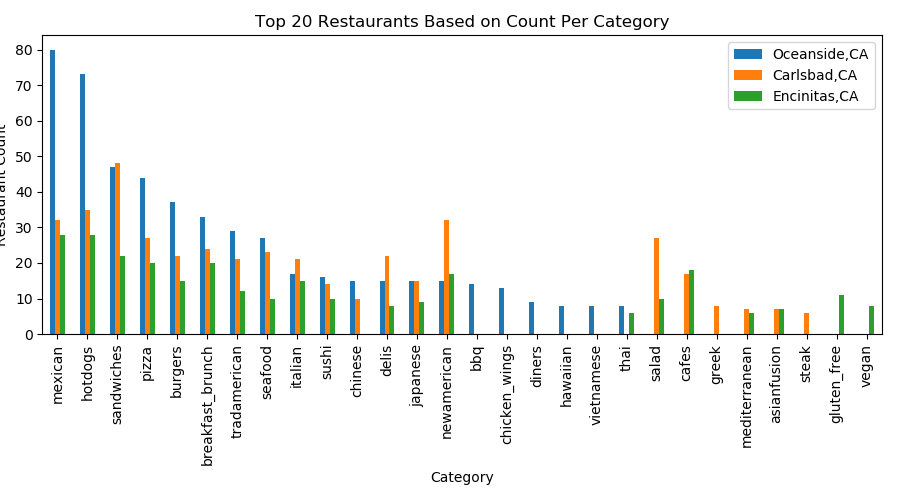

In [18]:
OCE_top20_count.plot(kind='bar', figsize=(9,5))
plt.title('Top 20 Restaurants Based on Count Per Category')
plt.tight_layout()
plt.ylabel('Restaurant Count')
plt.savefig('OCE_top20_count.png')

In [19]:
#Restaurants Rating

In [20]:
#Restaurant Rating - Oceanside
oceanside_df = restaurants_df.loc[(restaurants_df["City"]=="Oceanside,CA") & (restaurants_df["Review Count"]>= 20),:]
oceanside_restaurant_rating = oceanside_df.groupby("Category")['Rating'].agg('mean')
oceanside_restaurant_rating = pd.DataFrame(oceanside_restaurant_rating)
oceanside_restaurant_rating.head()

,Rating
Category,
asianfusion,3.666667
bbq,4.045455
breakfast_brunch,3.828125
buffets,3.166667
burgers,3.015152


<IPython.core.display.Javascript object>


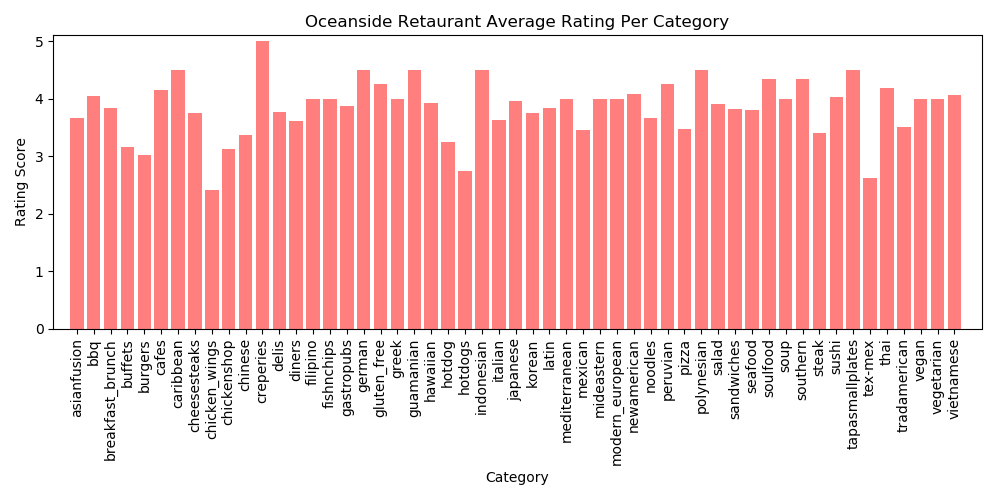

In [21]:
O_restaurant_rating_mean = oceanside_restaurant_rating.reset_index()
x_axis = np.arange(len(O_restaurant_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, O_restaurant_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, O_restaurant_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(O_restaurant_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Oceanside Retaurant Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('oceanside_avg_rating.png')
plt.show()

In [22]:
#Restaurant Rating - Carlsbad
carlsbad_df = restaurants_df.loc[(restaurants_df["City"]=="Carlsbad,CA") & (restaurants_df["Review Count"]>= 20),:]
carlsbad_restaurant_rating = carlsbad_df.groupby("Category")['Rating'].agg('mean')
carlsbad_restaurant_rating_df = pd.DataFrame(carlsbad_restaurant_rating)
carlsbad_restaurant_rating_df.head()

,Rating
Category,
asianfusion,3.583333
bbq,3.400000
breakfast_brunch,3.770833
buffets,3.625000
burgers,3.425000


<IPython.core.display.Javascript object>


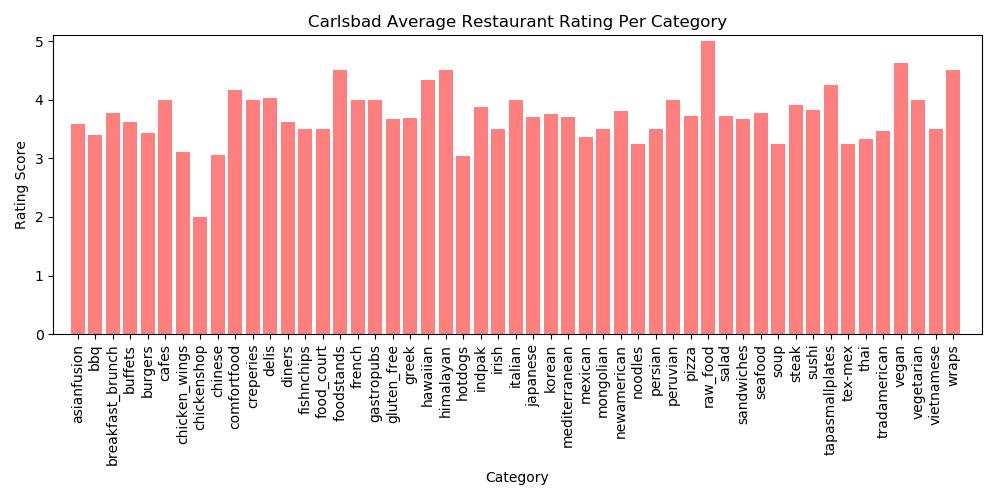

In [23]:
C_restaurant_rating_mean = carlsbad_restaurant_rating_df.reset_index()
x_axis = np.arange(len(C_restaurant_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, C_restaurant_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, C_restaurant_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Carlsbad Average Restaurant Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('carlsbad_avg_rating.png')
plt.show()

In [24]:
#Restaurant Rating - Encinitas
encinitas_df = restaurants_df.loc[(restaurants_df["City"]=="Encinitas,CA") & (restaurants_df["Review Count"]>= 20),:]
encinitas_restaurant_rating = encinitas_df.groupby("Category")['Rating'].agg('mean')
encinitas_restaurant_rating_df = pd.DataFrame(encinitas_restaurant_rating)
encinitas_restaurant_rating_df.head()

,Rating
Category,
asianfusion,3.833333
brazilian,4.000000
breakfast_brunch,3.775000
buffets,3.000000
burgers,3.366667


<IPython.core.display.Javascript object>


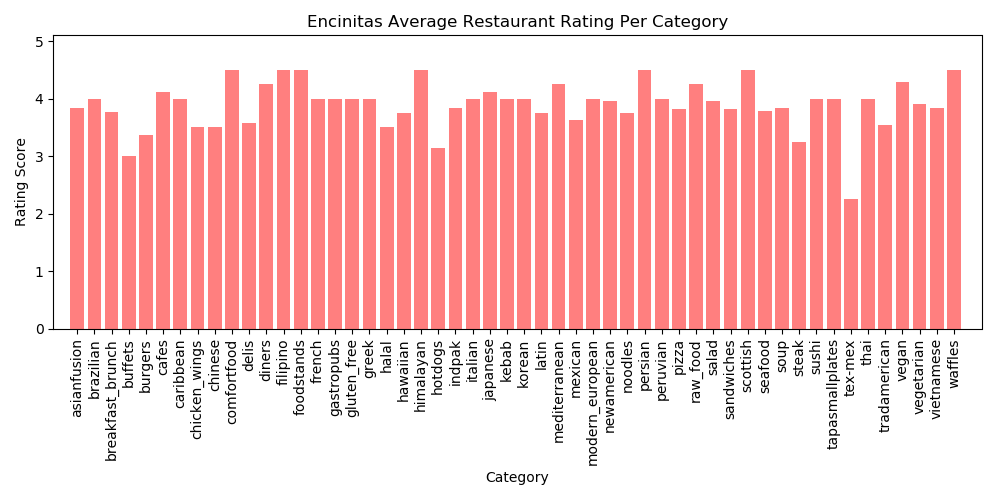

In [25]:
E_restaurant_rating_mean = encinitas_restaurant_rating_df.reset_index()
x_axis = np.arange(len(E_restaurant_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, E_restaurant_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, E_restaurant_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(E_restaurant_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Encinitas Average Restaurant Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('encinitas_avg_rating.png')
plt.show()

In [26]:
#Merged Files - Restaurant Rating Oceanside, Carlsbad
restaurant_rating = pd.merge(oceanside_restaurant_rating,carlsbad_restaurant_rating_df, on="Category", how="outer")
restaurant_rating_df = restaurant_rating.rename(columns={"Rating_x": "Avg Oceanside Restaurant Rating", "Rating_y":"Avg Carlsbad Restaurant Rating"})
restaurant_rating_df.head()

,Avg Oceanside Restaurant Rating,Avg Carlsbad Restaurant Rating
Category,,
asianfusion,3.666667,3.583333
bbq,4.045455,3.400000
breakfast_brunch,3.828125,3.770833
buffets,3.166667,3.625000
burgers,3.015152,3.425000


In [27]:
#Merged Files (side-by- side) - Restaurant Rating Oceanside, Carlsbad, Encinitas
OCE_restaurant_rating = pd.merge(restaurant_rating_df,encinitas_restaurant_rating_df, on="Category", how="outer")
OCE_restaurant_rating.rename(columns={"Rating": "Avg Encinitas Restaurant Rating"},inplace=True)
OCE_restaurant_rating

,Avg Oceanside Restaurant Rating,Avg Carlsbad Restaurant Rating,Avg Encinitas Restaurant Rating
Category,,,
asianfusion,3.666667,3.583333,3.833333
bbq,4.045455,3.400000,NaN
breakfast_brunch,3.828125,3.770833,3.775000
buffets,3.166667,3.625000,3.000000
burgers,3.015152,3.425000,3.366667
cafes,4.142857,4.000000,4.107143
caribbean,4.500000,NaN,4.000000
cheesesteaks,3.750000,NaN,NaN
chicken_wings,2.409091,3.100000,3.500000


In [28]:
O_top20_rating = oceanside_restaurant_rating.sort_values('Rating',ascending=False)
O_top20_rating.head(20)
O_top20_rating = O_top20_rating.iloc[:20]
O_top20_rating.head()

,Rating
Category,
creperies,5.0
polynesian,4.5
indonesian,4.5
caribbean,4.5
tapasmallplates,4.5


<IPython.core.display.Javascript object>


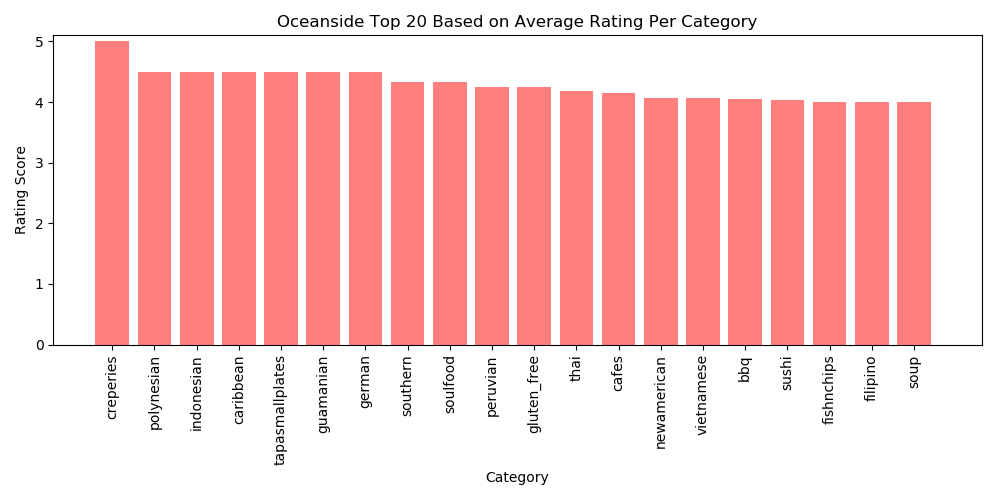

In [29]:
O_restaurant_top20_rating_mean = O_top20_rating.reset_index()
x_axis = np.arange(len(O_restaurant_top20_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, O_restaurant_top20_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, O_restaurant_top20_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(O_restaurant_top20_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Oceanside Top 20 Based on Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('Oceanside_top20_avg_rating.png')
plt.show()

In [30]:
C_top20_rating = carlsbad_restaurant_rating_df.sort_values('Rating',ascending=False)
#C_top20_rating.head()
C_top20_rating = C_top20_rating.iloc[:20]
C_top20_rating.head()

,Rating
Category,
raw_food,5.000
vegan,4.625
wraps,4.500
foodstands,4.500
himalayan,4.500


<IPython.core.display.Javascript object>


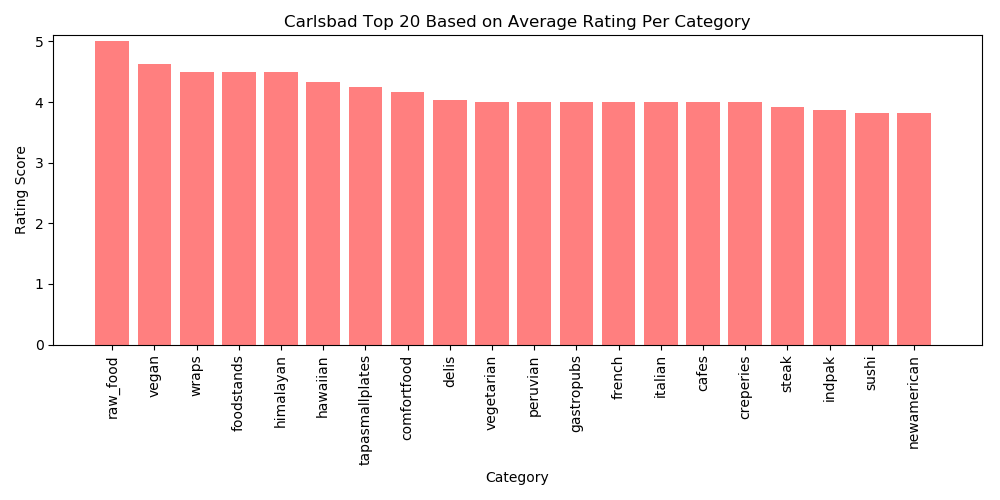

In [31]:
C_restaurant_top20_rating_mean = C_top20_rating.reset_index()
x_axis = np.arange(len(C_restaurant_top20_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, C_restaurant_top20_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, C_restaurant_top20_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_top20_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Carlsbad Top 20 Based on Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('Carlsbad_top20_avg_rating.png')
plt.show()

In [32]:
E_sorted_avg_rating = encinitas_restaurant_rating_df.sort_values('Rating',ascending=False)
#C_top20_rating.head()
E_top20_avgrating = E_sorted_avg_rating.iloc[:20]
E_top20_avgrating.head()

,Rating
Category,
waffles,4.5
scottish,4.5
persian,4.5
foodstands,4.5
filipino,4.5


<IPython.core.display.Javascript object>


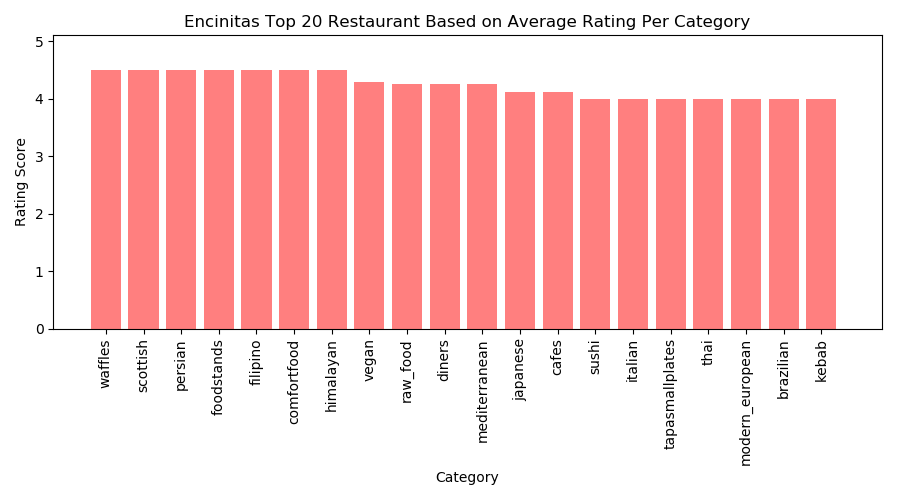

In [33]:
E_restaurant_top20_rating_mean = E_top20_avgrating.reset_index()
x_axis = np.arange(len(E_restaurant_top20_rating_mean['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(9,5))
plt.bar(x_axis, E_restaurant_top20_rating_mean["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, E_restaurant_top20_rating_mean['Category'], rotation="vertical")
plt.xlim(-1, len(E_restaurant_top20_rating_mean) +1)
plt.ylim(0, 5.1)
plt.title("Encinitas Top 20 Restaurant Based on Average Rating Per Category")
plt.xlabel("Category")
plt.ylabel("Rating Score")
plt.tight_layout()
plt.savefig('Encinitas_top20_avg_rating.png')
plt.show()

In [34]:
OC_top20_rating = pd.merge(O_top20_rating,C_top20_rating, on="Category", how="outer")
OC_Top20_Rating = OC_top20_rating.rename(columns={"Rating_x": "Oceanside Avg Rating", "Rating_y": "Carlsbad Avg Rating"})
#OC_Top20_Rating

In [35]:
#side_by-side avg rating comparison 
OCE_top20_rating = pd.merge(OC_Top20_Rating,E_top20_avgrating, on="Category", how="outer")
OCE_Top20_Rating = OCE_top20_rating.rename(columns={"Rating": "Encinitas Avg Rating"})
OCE_Top20_Rating.head()

,Oceanside Avg Rating,Carlsbad Avg Rating,Encinitas Avg Rating
Category,,,
creperies,5.0,4.00,NaN
polynesian,4.5,NaN,NaN
indonesian,4.5,NaN,NaN
caribbean,4.5,NaN,NaN
tapasmallplates,4.5,4.25,4.0


<IPython.core.display.Javascript object>


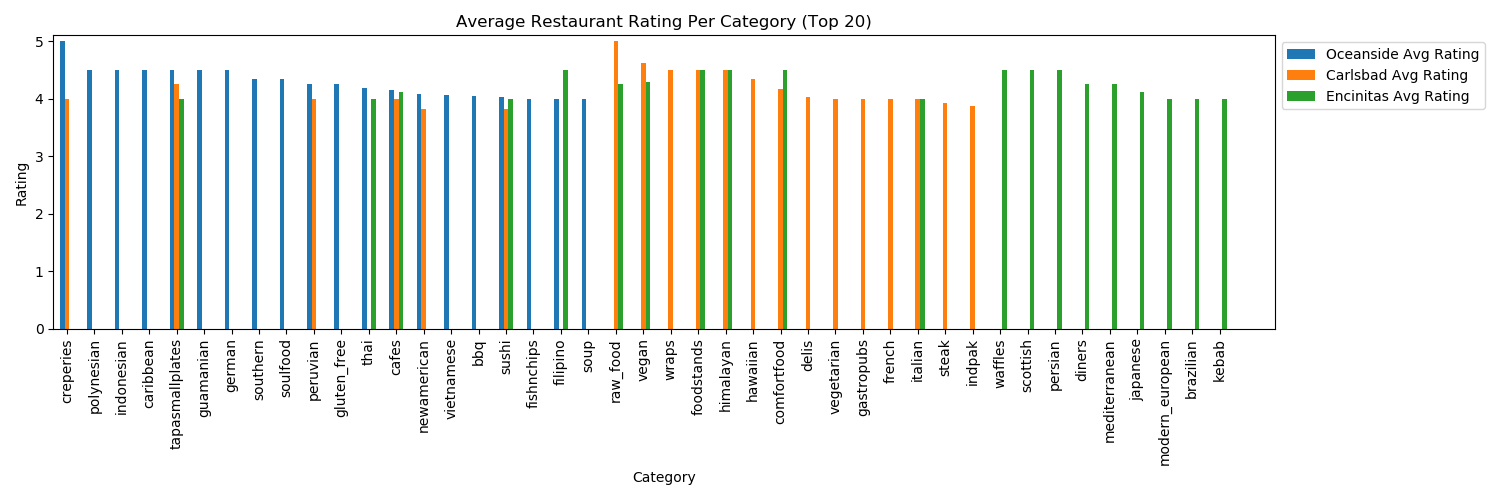

In [36]:
OCE_restaurant_top20_rating_mean = OCE_Top20_Rating.reset_index()
OCE_restaurant_top20_rating_mean.plot(kind="bar", figsize=(15,5)).legend(bbox_to_anchor=(1, 1))                                                                  
x_axis = np.arange(len(OCE_restaurant_top20_rating_mean['Category']))
tick_locations = [value+0.0 for value in x_axis]
plt.title("Average Restaurant Rating Per Category (Top 20)")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(tick_locations, OCE_restaurant_top20_rating_mean['Category'], rotation="vertical")
plt.xlim(-.5, len(OCE_restaurant_top20_rating_mean) +1)
plt.ylim(0, 5.1)
plt.tight_layout()
plt.savefig('OCE_rest_top20_avg_rating.png')
plt.show()

In [37]:
#Review Count

In [38]:
#Restaurant Review Count Per Category- Oceanside
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_review_count = oceanside_df.groupby("Category")['Review Count'].agg('sum')
oceanside_restaurant_review_count_df = pd.DataFrame(oceanside_restaurant_review_count)
oceanside_restaurant_review_count_df

,Review Count
Category,
afghani,1
asianfusion,2306
bbq,5633
breakfast_brunch,11938
buffets,302
burgers,6154
cafes,2511
cafeteria,4
caribbean,317


<IPython.core.display.Javascript object>


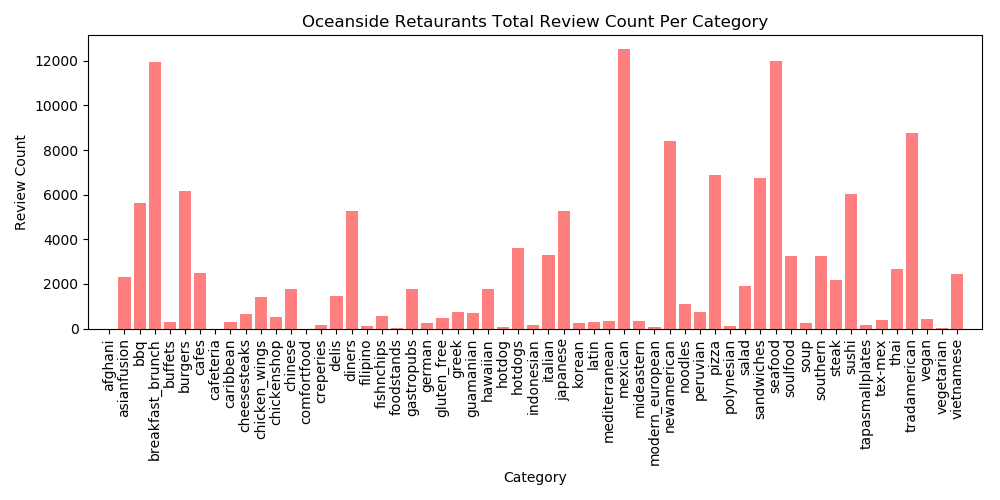

In [39]:
O_restaurant_review_count = oceanside_restaurant_review_count_df.reset_index()
x_axis = np.arange(len(O_restaurant_review_count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, O_restaurant_review_count["Review Count"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, O_restaurant_review_count['Category'], rotation="vertical")
plt.xlim(-1, len(O_restaurant_review_count) +1)
plt.title("Oceanside Retaurants Total Review Count Per Category")
plt.xlabel("Category")
plt.ylabel("Review Count")
plt.tight_layout()
plt.savefig('oceanside_review_count.png')
plt.show()

In [40]:
#Restaurant Review Count Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_review_count = carlsbad_df.groupby("Category")['Review Count'].agg('sum')
carlsbad_restaurant_review_count_df = pd.DataFrame(carlsbad_restaurant_review_count)
carlsbad_restaurant_review_count_df.head()

,Review Count
Category,
asianfusion,1777
bbq,1174
breakfast_brunch,8825
buffets,906
burgers,6319


<IPython.core.display.Javascript object>


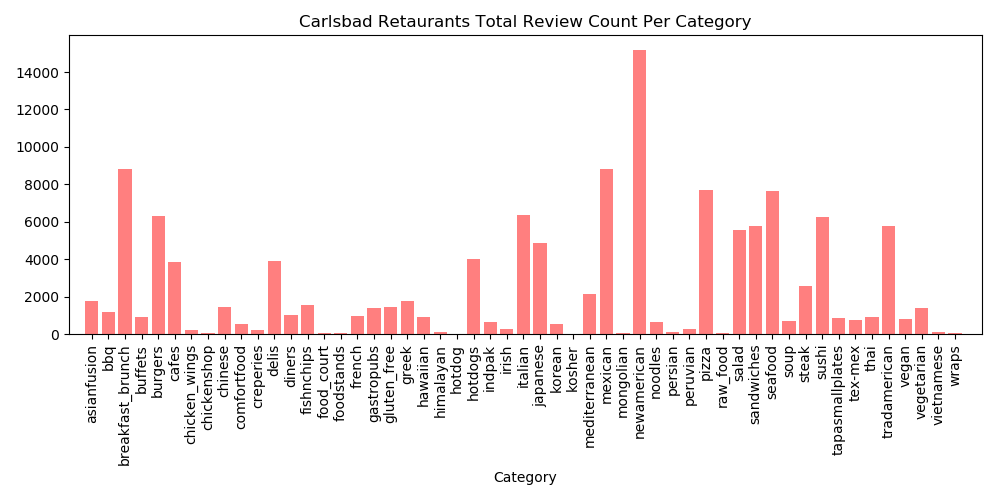

In [41]:
C_restaurant_review_count = carlsbad_restaurant_review_count_df.reset_index()
x_axis = np.arange(len(C_restaurant_review_count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, C_restaurant_review_count["Review Count"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, C_restaurant_review_count['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_review_count) +1)
plt.title("Carlsbad Retaurants Total Review Count Per Category")
plt.xlabel("Category")
plt.tight_layout()
plt.savefig('carlsbad_review_count.png')
plt.show()

In [42]:
#Restaurant Review Count Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_review_count = encinitas_df.groupby("Category")['Review Count'].agg('sum')
encinitas_restaurant_review_count_df = pd.DataFrame(encinitas_restaurant_review_count)
#encinitas_restaurant_review_count_df.head()

<IPython.core.display.Javascript object>


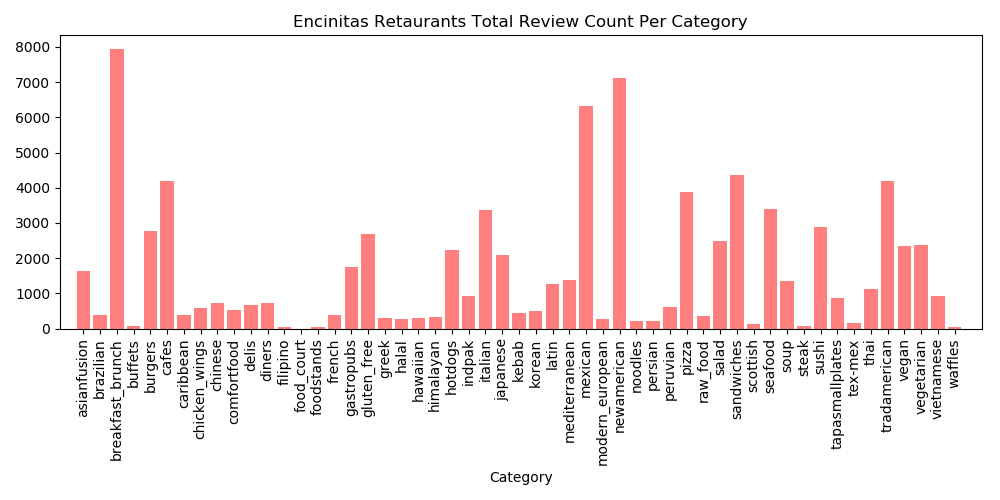

In [43]:
E_restaurant_review_count = encinitas_restaurant_review_count_df.reset_index()
x_axis = np.arange(len(E_restaurant_review_count['Category']))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, E_restaurant_review_count["Review Count"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, E_restaurant_review_count['Category'], rotation="vertical")
plt.xlim(-1, len(C_restaurant_review_count) +1)
plt.title("Encinitas Retaurants Total Review Count Per Category")
plt.xlabel("Category")
plt.tight_layout()
plt.savefig('encinitas_review_count.png')
plt.show()

In [44]:
OC_review_count = pd.merge(oceanside_restaurant_review_count_df,carlsbad_restaurant_review_count_df, on="Category", how="outer")
OC_review_count.head()
OC_review_count_df = OC_review_count.rename(columns={"Review Count_x": "Oceanside Review Count",
                                 "Review Count_y": "Carlsbad Review Count"})
#OC_review_count_df.head()

In [45]:
OCE_review_count = pd.merge(OC_review_count_df,encinitas_restaurant_review_count_df, on="Category", how="outer")
OCE_review_count_df = OCE_review_count.rename(columns={"Review Count": "Encinitas Review Count"})
OCE_review_count_df.head()

,Oceanside Review Count,Carlsbad Review Count,Encinitas Review Count
Category,,,
afghani,1.0,NaN,NaN
asianfusion,2306.0,1777.0,1634.0
bbq,5633.0,1174.0,NaN
breakfast_brunch,11938.0,8825.0,7932.0
buffets,302.0,906.0,67.0


In [46]:
O_top20_review_count = oceanside_restaurant_review_count_df.sort_values('Review Count',ascending=False)
#O_top20_review_count.head(20)
O_top20_reviewcount = O_top20_review_count.iloc[:20]
O_top20_reviewcount.head()

,Review Count
Category,
mexican,12516
seafood,11974
breakfast_brunch,11938
tradamerican,8759
newamerican,8417


In [47]:
C_top20_review_count = carlsbad_restaurant_review_count_df.sort_values('Review Count',ascending=False)
#C_top20_review_count.head(20)
C_top20_reviewcount = C_top20_review_count.iloc[:20]
C_top20_reviewcount.head()

,Review Count
Category,
newamerican,15201
breakfast_brunch,8825
mexican,8815
pizza,7722
seafood,7663


In [48]:
E_top20_review_count = encinitas_restaurant_review_count_df.sort_values('Review Count',ascending=False)
E_top20_review_count.head(20)
E_top20_reviewcount = E_top20_review_count.iloc[:20]
E_top20_reviewcount.head()

,Review Count
Category,
breakfast_brunch,7932
newamerican,7105
mexican,6327
sandwiches,4356
cafes,4201


In [49]:
OC_top20_review_count = pd.merge(O_top20_reviewcount,C_top20_reviewcount, on="Category", how="outer")
OC_top20_rev_count = OC_top20_review_count.rename(columns={"Review Count_x":"Oceanside Review Count","Review Count_y":"Carlsbad Review Count"})
OCE_top20_rev_count = pd.merge(OC_top20_rev_count, E_top20_reviewcount, on="Category", how="outer")
OCE_top20_review_count = OCE_top20_rev_count.rename(columns={"Review Count": "Encinitas Review Count"})
OCE_top20_review_count.head()

,Oceanside Review Count,Carlsbad Review Count,Encinitas Review Count
Category,,,
mexican,12516.0,8815.0,6327.0
seafood,11974.0,7663.0,3405.0
breakfast_brunch,11938.0,8825.0,7932.0
tradamerican,8759.0,5767.0,4185.0
newamerican,8417.0,15201.0,7105.0


<IPython.core.display.Javascript object>


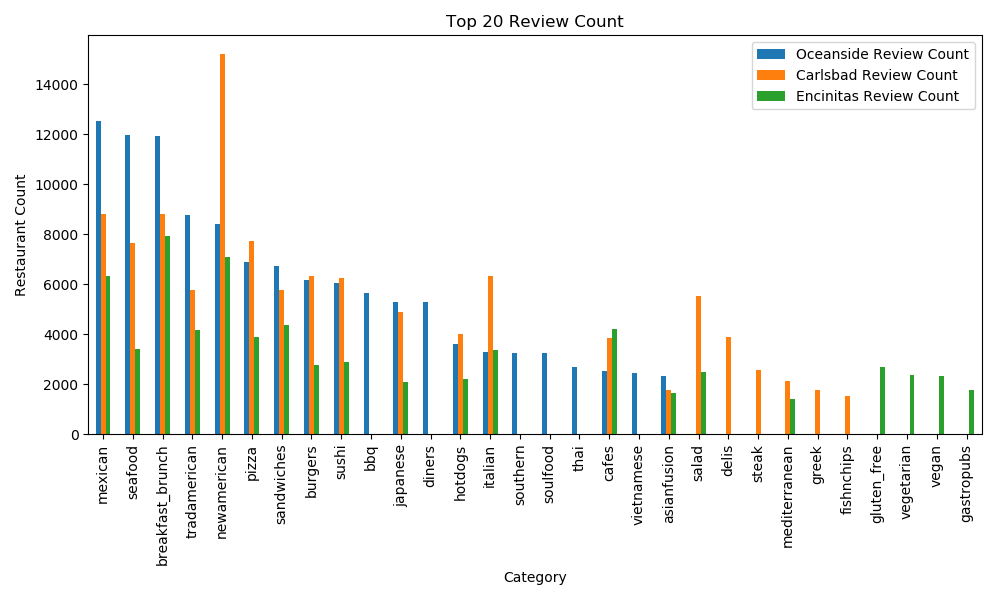

In [50]:
OCE_top20_review_count.plot(kind="bar", figsize=(10,6))
plt.title("Top 20 Review Count")
plt.ylabel("Restaurant Count")
plt.savefig('OCE_top20_review_count.png')
plt.tight_layout()


In [51]:
#Price 

In [52]:
#Restaurant Price Per Category- Carlsbad
oceanside_df = restaurants_df.loc[restaurants_df["City"]=="Oceanside,CA",:]
oceanside_restaurant_price = oceanside_df.groupby("Category")['Price'].agg('mean')
oceanside_restaurant_price_df = pd.DataFrame(oceanside_restaurant_price)
oceanside_restaurant_price_df.head()

,Price
Category,
afghani,1.000000
asianfusion,1.833333
bbq,1.285714
breakfast_brunch,1.393939
buffets,2.000000


In [53]:
#Restaurant Price Per Category- Carlsbad
carlsbad_df = restaurants_df.loc[restaurants_df["City"]=="Carlsbad,CA",:]
carlsbad_restaurant_price = carlsbad_df.groupby("Category")['Price'].agg('mean')
carlsbad_restaurant_price_df = pd.DataFrame(carlsbad_restaurant_price)
carlsbad_restaurant_price_df.head()

,Price
Category,
asianfusion,1.428571
bbq,1.800000
breakfast_brunch,1.500000
buffets,2.000000
burgers,1.636364


In [54]:
#Restaurant Price Per Category- Encinitas
encinitas_df = restaurants_df.loc[restaurants_df["City"]=="Encinitas,CA",:]
encinitas_restaurant_price = encinitas_df.groupby("Category")['Price'].agg('mean')
encinitas_restaurant_price_df = pd.DataFrame(encinitas_restaurant_price)
encinitas_restaurant_price_df.head()

,Price
Category,
asianfusion,1.428571
brazilian,2.000000
breakfast_brunch,1.600000
buffets,2.000000
burgers,1.200000


In [55]:
#Price merge Oceanside and Carlsbad
OC_price_mean = pd.merge(oceanside_restaurant_price_df,carlsbad_restaurant_price_df, on="Category", how="outer")
OC_price_mean.head()
OC_price_mean_df = OC_price_mean.rename(columns={"Price_x": "Oceanside Mean Price",
                                 "Price_y": "Carlsbad Mean Price"})
#OC_price_mean_df.head()

In [56]:
#Price merge Oceanside, Carlsbad, Encinitas
OCE_price_mean = pd.merge(OC_price_mean_df,encinitas_restaurant_price_df, on="Category", how="outer")
OCE_price_mean_df = OCE_price_mean.rename(columns={"Price": "Encinitas Mean Price"})
OCE_price_mean_df.head()

,Oceanside Mean Price,Carlsbad Mean Price,Encinitas Mean Price
Category,,,
afghani,1.000000,NaN,NaN
asianfusion,1.833333,1.428571,1.428571
bbq,1.285714,1.800000,NaN
breakfast_brunch,1.393939,1.500000,1.600000
buffets,2.000000,2.000000,2.000000


In [57]:
#Total Asian Restaurant Count Per City

In [58]:
asian_categories = ['asianfusion','chinese','japanese','korean','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
Total_Restaurant_df= total_restaurant_df.reset_index()
OCE_Asian_Restarants_total_count = Total_Restaurant_df.loc[Total_Restaurant_df['Category'].isin(asian_categories),:]
OCE_asian_restarants_total_count=OCE_Asian_Restarants_total_count.set_index('Category')
OCE_asian_restarants_total_count

,"Oceanside,CA","Encinitas,CA","Carlsbad,CA"
Category,,,
asianfusion,6,7,7
chinese,15,6,10
japanese,15,9,15
korean,2,2,2
mongolian,0,0,1
noodles,3,2,2
sushi,16,10,14
taiwanese,0,0,0
thai,8,6,3


<IPython.core.display.Javascript object>


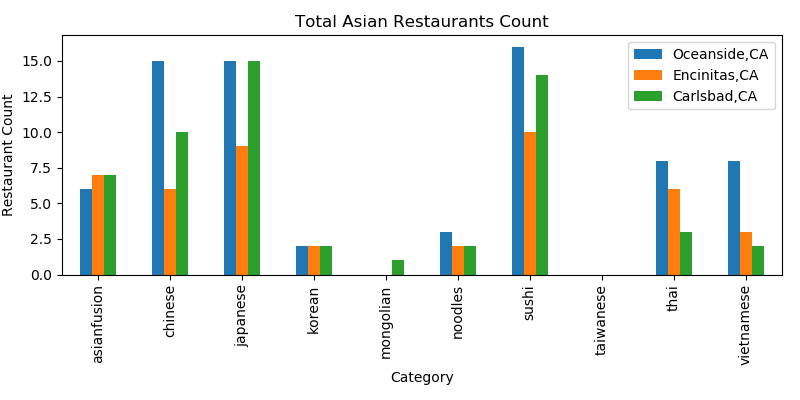

In [59]:
OCE_asian_restarants_total_count.plot(kind="bar", figsize=(8,4))
plt.title("Total Asian Restaurants Count")
plt.ylabel("Restaurant Count")
plt.savefig('asian_rest_count.png')
plt.tight_layout()

In [60]:
#Average Asian Restaurant Rating

In [61]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
OCE_Restaurant_Rating = OCE_restaurant_rating.reset_index()
OCE_Asian_Restaurants_rating_mean = OCE_Restaurant_Rating.loc[OCE_Restaurant_Rating['Category'].isin(asian_categories),:]
OCE_Asian_restaurants_rating_mean = OCE_Asian_Restaurants_rating_mean.set_index('Category')
OCE_Asian_restaurants_rating_mean

,Avg Oceanside Restaurant Rating,Avg Carlsbad Restaurant Rating,Avg Encinitas Restaurant Rating
Category,,,
asianfusion,3.666667,3.583333,3.833333
chinese,3.375000,3.055556,3.500000
japanese,3.964286,3.714286,4.111111
korean,3.750000,3.750000,4.000000
noodles,3.666667,3.250000,3.750000
sushi,4.033333,3.821429,4.000000
thai,4.187500,3.333333,4.000000
vietnamese,4.062500,3.500000,3.833333
mongolian,NaN,3.500000,NaN


<IPython.core.display.Javascript object>


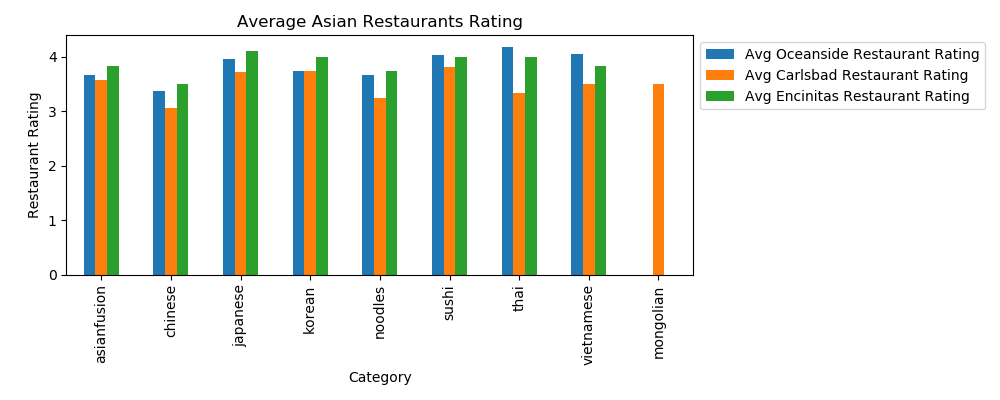

In [62]:
OCE_Asian_restaurants_rating_mean.plot(kind="bar", figsize=(10,4)).legend(bbox_to_anchor=(1, 1))
plt.title('Average Asian Restaurants Rating')
plt.ylabel("Restaurant Rating")
plt.savefig('asian_rest_rating.png')
plt.tight_layout()

In [63]:
#Asian Restaurants Total Review Count

In [64]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
OCE_Reviews_count_df = OCE_review_count_df.reset_index()
OCE_Asian_Restarants_review_count = OCE_Reviews_count_df.loc[OCE_Reviews_count_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_review_count = OCE_Asian_Restarants_review_count.set_index('Category')
OCE_Asian_Restarants_review_count

,Oceanside Review Count,Carlsbad Review Count,Encinitas Review Count
Category,,,
asianfusion,2306.0,1777.0,1634.0
chinese,1779.0,1443.0,717.0
japanese,5289.0,4887.0,2080.0
korean,264.0,533.0,492.0
noodles,1088.0,672.0,227.0
sushi,6052.0,6266.0,2885.0
thai,2673.0,890.0,1131.0
vietnamese,2454.0,92.0,916.0
mongolian,NaN,52.0,NaN


<IPython.core.display.Javascript object>


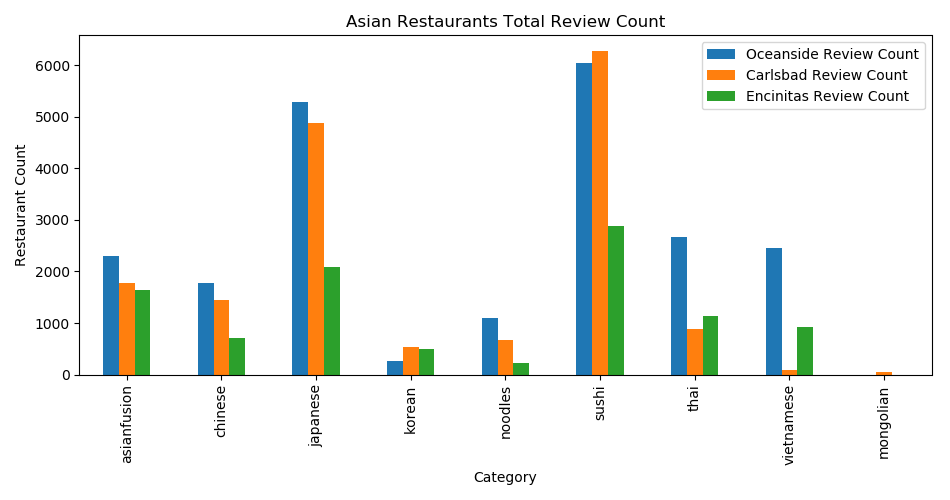

In [65]:
OCE_Asian_Restarants_review_count.plot(kind="bar",figsize=(9.5,5)).legend(bbox_to_anchor=(1, 1))
plt.title('Asian Restaurants Total Review Count')
plt.ylabel('Restaurant Count')
plt.tight_layout()
plt.savefig('OCE_asian_rest_review_count.png')

In [66]:
#Asian Restaurant Mean Price

In [67]:
asian_categories = ['asianfusion','chinese','dumplings','japanese','korean','malaysian','mongolian','noodles','sushi','taiwanese','thai','vietnamese']
OCE_price_mean_df.reset_index(inplace=True)
OCE_Asian_Restarants_Price = OCE_price_mean_df.loc[OCE_price_mean_df['Category'].isin(asian_categories),:]
OCE_Asian_Restarants_Price = OCE_Asian_Restarants_Price.set_index('Category')
OCE_Asian_Restarants_Price

,Oceanside Mean Price,Carlsbad Mean Price,Encinitas Mean Price
Category,,,
asianfusion,1.833333,1.428571,1.428571
chinese,0.933333,1.500000,1.000000
japanese,1.600000,1.800000,1.888889
korean,2.000000,2.000000,1.000000
noodles,1.333333,1.500000,1.500000
sushi,1.625000,1.928571,1.900000
thai,2.000000,1.666667,1.500000
vietnamese,0.875000,1.500000,1.666667
mongolian,NaN,1.000000,NaN


<IPython.core.display.Javascript object>


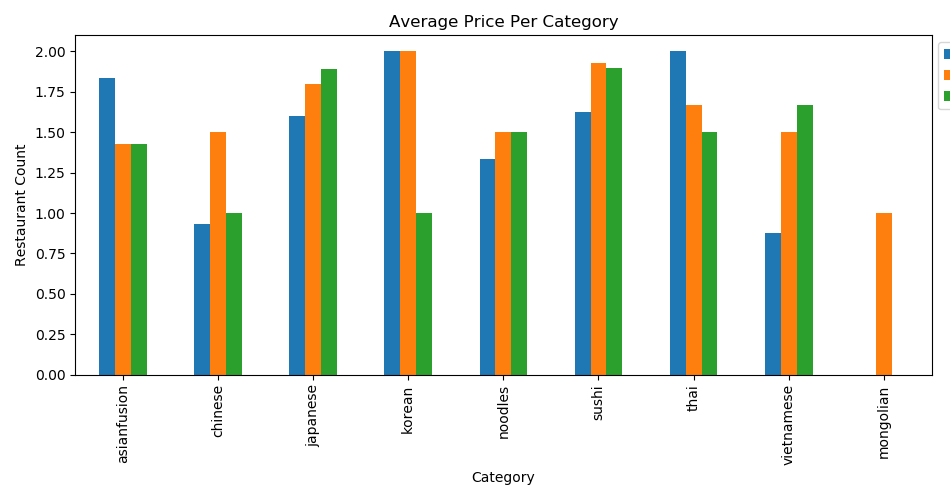

In [68]:
OCE_Asian_Restarants_Price.plot(kind='bar', figsize=(9.5,5)).legend(bbox_to_anchor=(1, 1))
plt.title("Average Price Per Category")
plt.ylabel("Restaurant Count")
plt.savefig('OCE_asian_rest_avg_price.png')
plt.tight_layout()